In [173]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import pickle

In [32]:
data = pd.read_csv("Medicalpremium.csv")

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [34]:
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [35]:
print(data.isnull().sum())

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


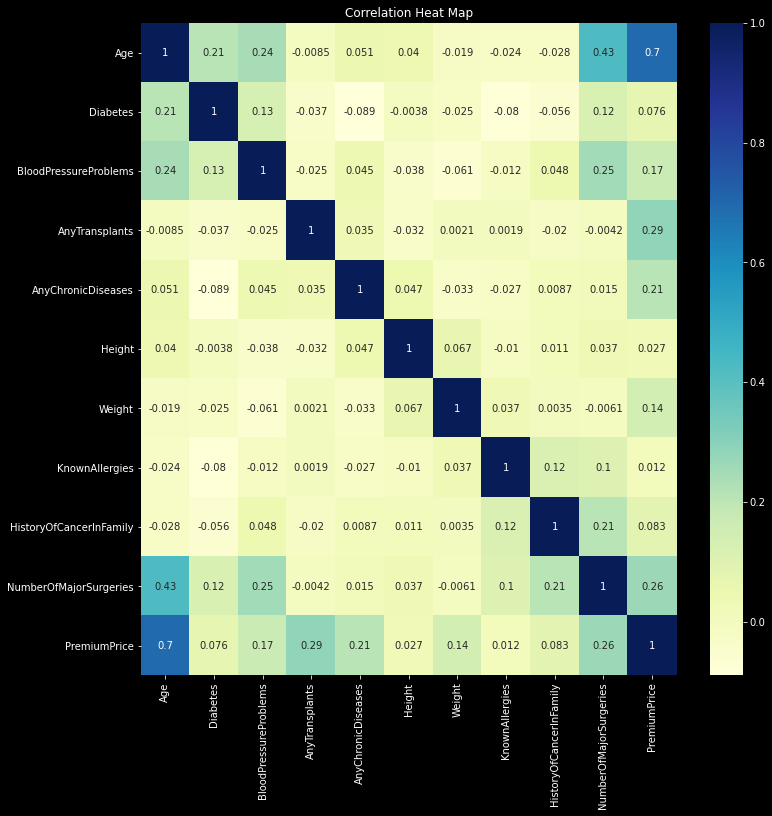

In [36]:
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')
plt.title('Correlation Heat Map')
plt.show()


In [37]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


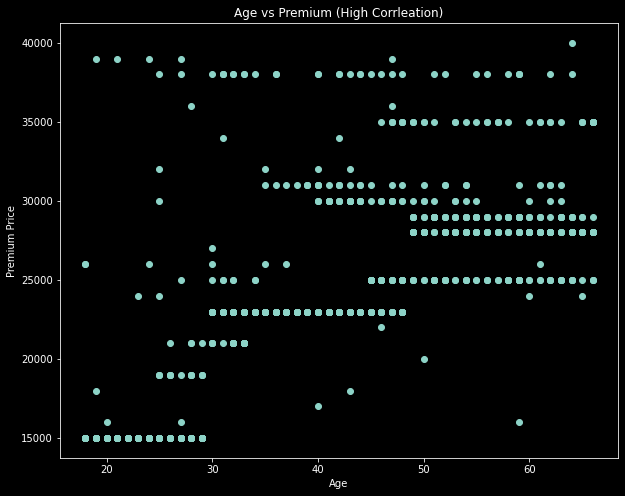

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(data['Age'], data['PremiumPrice'])
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.title('Age vs Premium (High Corrleation)')
plt.show()

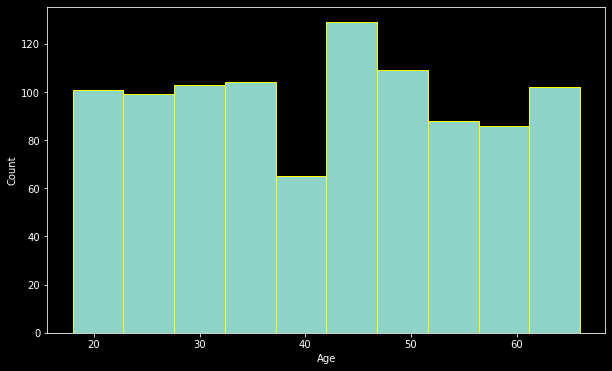

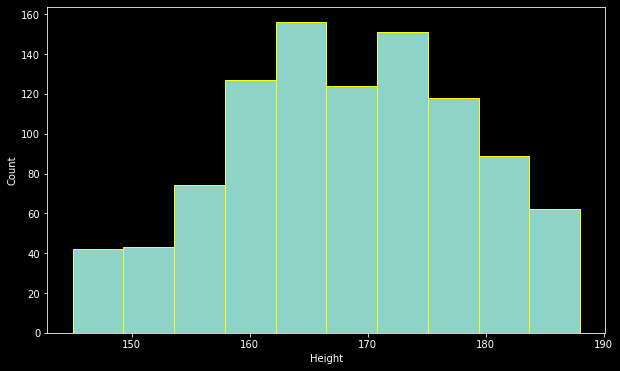

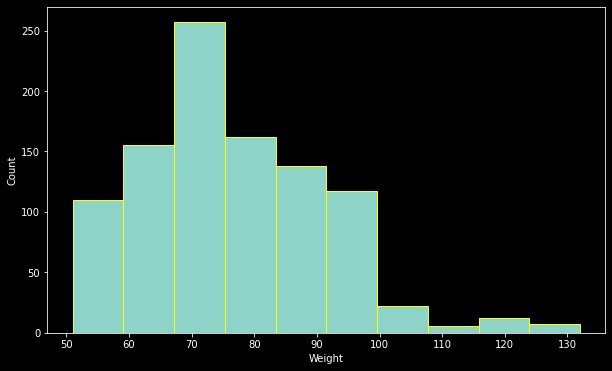

In [39]:
plots_vars = ['Age', 'Height', 'Weight']

def make_plot(var):
    plt.figure(figsize = (10,6))
    plt.hist(data[var], edgecolor = 'YELLOW')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

for var in plots_vars: 
    make_plot(var)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler  = StandardScaler()
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 777)

In [41]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((739, 10), (247, 10), (739,), (247,))

In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [164]:
def model_build_results(regressor, Xtrain, Xtest, model_name):
    regressor.fit(Xtrain, y_train)
    y_pred = regressor.predict(Xtest)
    print(f"Accuracy Score for {model_name} is :", regressor.score(Xtest, y_test))
    print(f"Mean Squared Error for {model_name} is: ", mean_squared_error(y_test, y_pred))
    return regressor 

In [165]:
linear_regressor = LinearRegression()
linear_model = model_build_results(linear_regressor, X_train_scaled, X_test_scaled, "Linear Regression")

Accuracy Score for Linear Regression is : 0.5257409995924469
Mean Squared Error for Linear Regression is:  18486609.461541977


In [166]:
lasso = Lasso()
lasso_model = model_build_results(lasso, X_train_scaled, X_test_scaled, "Lasso Regression")

Accuracy Score for Lasso Regression is : 0.525781191104074
Mean Squared Error for Lasso Regression is:  18485042.79695895


In [167]:
ridge= Ridge()
ridge_model =model_build_results(ridge, X_train_scaled, X_test_scaled, "Ridge Regression")

Accuracy Score for Ridge Regression is : 0.5258351462011085
Mean Squared Error for Ridge Regression is:  18482939.628001735


In [168]:
svr = SVR(C= 1.0, epsilon= 0.1, kernel="linear")
svr_model = model_build_results(svr, X_train_scaled, X_test_scaled, "Support Vector Regressor")

Accuracy Score for Support Vector Regressor is : 0.10504921617056195
Mean Squared Error for Support Vector Regressor is:  34885169.52496027


In [169]:
random_forest = RandomForestRegressor(n_estimators= 370)
random_forest_model = model_build_results(random_forest, X_train, X_test, "Random Forest Regressor")

Accuracy Score for Random Forest Regressor is : 0.7003905510132251
Mean Squared Error for Random Forest Regressor is:  11678772.294561768


In [170]:
dtree = DecisionTreeRegressor(criterion="mse", max_features="sqrt")
dtree_model = model_build_results(dtree, X_train, X_test, "Decision Tree Regressor")

Accuracy Score for Decision Tree Regressor is : 0.5518306400407043
Mean Squared Error for Decision Tree Regressor is:  17469635.627530366


In [171]:
xgb = XGBRegressor(n_estimators=100, max_depth=4, colsample_bytree = 0.8, eta = 0.10111111)
xgb_model = model_build_results(xgb, X_train, X_test, "XGboost Regressor")

Accuracy Score for XGboost Regressor is : 0.6862601451707595
Mean Squared Error for XGboost Regressor is:  12229575.324379385


In [176]:
xg_path = "D:/JUPYTER/Projects/Medical-Premium-Prediction/xgb.pickle"
rf_path = "D:/JUPYTER/Projects/Medical-Premium-Prediction/rf.pickle"
pickle.dump(xgb_model, open(xg_path,"wb"))
pickle.dump(random_forest_model, open(rf_path,"wb"))